In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *
from networks.LinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = LinkNet152()
if cuda_available:
    model.cuda()

print(model)

Wed Jan 22 09:08:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             16W /  340W |     699MiB /  16376MiB |     18%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet152(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.4033120572566986
→ ACC for Batch 1: 0.015490531921386719
→ Recall for Batch 1: 0.9968715782887533
→ Running_loss for Batch 21: 0.3967553973197937
→ ACC for Batch 21: 0.9845314025878906
→ Recall for Batch 21: 0.003751705320600273
→ Running_loss for Batch 41: 0.36910122632980347
→ ACC for Batch 41: 0.9753551483154297
→ Recall for Batch 41: 0.4423638655720567
→ Running_loss for Batch 61: 0.3016199767589569
→ ACC for Batch 61: 0.9671363830566406
→ Recall for Batch 61: 0.001663019693654267
→ Running_loss for Batch 81: 0.3575848639011383
→ ACC for Batch 81: 0.9822931289672852
→ Recall for Batch 81: 0.4932409597837107
→ Running_loss for Batch 101: 0.2997129559516907
→ ACC for Batch 101: 0.9799032211303711
→ Recall for Batch 101: 0.7343976777939042
→ Running_loss for Batch 121: 0.29767677187919617
→ ACC for Batch 121: 0.982670783996582
→ Recall for Batch 121: 0.7729586904685184
→ Running_loss for Batch 141: 0.27918

  1%|          | 1/100 [09:29<15:39:22, 569.31s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.22714921832084656
→ ACC for Batch 1: 0.9745235443115234
→ Recall for Batch 1: 0.4961848702855897
→ Running_loss for Batch 21: 0.1902070790529251
→ ACC for Batch 21: 0.9796304702758789
→ Recall for Batch 21: 0.5926556785732178
→ Running_loss for Batch 41: 0.17250894010066986
→ ACC for Batch 41: 0.9887075424194336
→ Recall for Batch 41: 0.6705002137665669
→ Running_loss for Batch 61: 0.18457621335983276
→ ACC for Batch 61: 0.9780092239379883
→ Recall for Batch 61: 0.6460037308078634
→ Running_loss for Batch 81: 0.17920684814453125
→ ACC for Batch 81: 0.9839115142822266
→ Recall for Batch 81: 0.6589321278411785
→ Running_loss for Batch 101: 0.17069867253303528
→ ACC for Batch 101: 0.9784412384033203
→ Recall for Batch 101: 0.6610714208160517
→ Running_loss for Batch 121: 0.15168242156505585
→ ACC for Batch 121: 0.9839410781860352
→ Recall for Batch 121: 0.7616723201235487
→ Running_loss for Batch 141: 0.220499

  2%|▏         | 2/100 [18:53<15:24:34, 566.06s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.1420994997024536
→ ACC for Batch 1: 0.9936885833740234
→ Recall for Batch 1: 0.8155654641264694
→ Running_loss for Batch 21: 0.16684117913246155
→ ACC for Batch 21: 0.9820089340209961
→ Recall for Batch 21: 0.7294749896651509
→ Running_loss for Batch 41: 0.19276650249958038
→ ACC for Batch 41: 0.9879541397094727
→ Recall for Batch 41: 0.7352591792656588
→ Running_loss for Batch 61: 0.16261889040470123
→ ACC for Batch 61: 0.9854583740234375
→ Recall for Batch 61: 0.8049744806268421
→ Running_loss for Batch 81: 0.13955527544021606
→ ACC for Batch 81: 0.9795551300048828
→ Recall for Batch 81: 0.8129903745045701
→ Running_loss for Batch 101: 0.20029468834400177
→ ACC for Batch 101: 0.9833230972290039
→ Recall for Batch 101: 0.6190022243406419
→ Running_loss for Batch 121: 0.1428951621055603
→ ACC for Batch 121: 0.9874992370605469
→ Recall for Batch 121: 0.7903953480600208
→ Running_loss for Batch 141: 0.1603746

  3%|▎         | 3/100 [28:09<15:08:13, 561.79s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.15990547835826874
→ ACC for Batch 1: 0.9907503128051758
→ Recall for Batch 1: 0.80454720193311
→ Running_loss for Batch 21: 0.18421430885791779
→ ACC for Batch 21: 0.9921121597290039
→ Recall for Batch 21: 0.8374567474048443
→ Running_loss for Batch 41: 0.1390412151813507
→ ACC for Batch 41: 0.9785280227661133
→ Recall for Batch 41: 0.7773659997079013
→ Running_loss for Batch 61: 0.14396266639232635
→ ACC for Batch 61: 0.9890956878662109
→ Recall for Batch 61: 0.8051411250639688
→ Running_loss for Batch 81: 0.1829821765422821
→ ACC for Batch 81: 0.9948015213012695
→ Recall for Batch 81: 0.6716325263811297
→ Running_loss for Batch 101: 0.16408346593379974
→ ACC for Batch 101: 0.9937467575073242
→ Recall for Batch 101: 0.6608701724980794
→ Running_loss for Batch 121: 0.18086571991443634
→ ACC for Batch 121: 0.9864234924316406
→ Recall for Batch 121: 0.7227887617065557
→ Running_loss for Batch 141: 0.180323973

  4%|▍         | 4/100 [36:54<14:35:22, 547.11s/it]

Validation loss for Epoch 4: 0.179087832570076

Acurácia de validação:  0.9855437874794006
F1-score de validação:  0.7172724284674958
IoU de validação:  0.9745908975199208
Recall de validação:  0.735652208239557

---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.12613730132579803
→ ACC for Batch 1: 0.98260498046875
→ Recall for Batch 1: 0.8243864078473573
→ Running_loss for Batch 21: 0.15261730551719666
→ ACC for Batch 21: 0.9815683364868164
→ Recall for Batch 21: 0.7759255197289854
→ Running_loss for Batch 41: 0.1418771594762802
→ ACC for Batch 41: 0.9807138442993164
→ Recall for Batch 41: 0.7940748039929737
→ Running_loss for Batch 61: 0.2160411775112152
→ ACC for Batch 61: 0.9947080612182617
→ Recall for Batch 61: 0.756074168797954
→ Running_loss for Batch 81: 0.15871387720108032
→ ACC for Batch 81: 0.9874105453491211
→ Recall for Batch 81: 0.7757838917921919
→ Running_loss for Batch 101: 0.14037270843982697
→ ACC for Batch 101: 0.9880208969116211
→ Reca

  5%|▌         | 5/100 [45:11<13:57:34, 528.99s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.1534057855606079
→ ACC for Batch 1: 0.9877433776855469
→ Recall for Batch 1: 0.7855253212396069
→ Running_loss for Batch 21: 0.10881852358579636
→ ACC for Batch 21: 0.9841403961181641
→ Recall for Batch 21: 0.8731298156637082
→ Running_loss for Batch 41: 0.14563967287540436
→ ACC for Batch 41: 0.9863100051879883
→ Recall for Batch 41: 0.7777572510622576
→ Running_loss for Batch 61: 0.1604343205690384
→ ACC for Batch 61: 0.9911947250366211
→ Recall for Batch 61: 0.6874255657006749
→ Running_loss for Batch 81: 0.11326415836811066
→ ACC for Batch 81: 0.990483283996582
→ Recall for Batch 81: 0.8330165180912428
→ Running_loss for Batch 101: 0.1585213541984558
→ ACC for Batch 101: 0.9859161376953125
→ Recall for Batch 101: 0.7699969509096453
→ Running_loss for Batch 121: 0.12779343128204346
→ ACC for Batch 121: 0.9916353225708008
→ Recall for Batch 121: 0.792862289662188
→ Running_loss for Batch 141: 0.1515695154

  6%|▌         | 6/100 [54:58<14:19:37, 548.70s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.10817204415798187
→ ACC for Batch 1: 0.989349365234375
→ Recall for Batch 1: 0.8614809956944484
→ Running_loss for Batch 21: 0.12709616124629974
→ ACC for Batch 21: 0.9884309768676758
→ Recall for Batch 21: 0.8374445543606599
→ Running_loss for Batch 41: 0.11060874909162521
→ ACC for Batch 41: 0.9866247177124023
→ Recall for Batch 41: 0.8775606755925628
→ Running_loss for Batch 61: 0.11681649833917618
→ ACC for Batch 61: 0.9898252487182617
→ Recall for Batch 61: 0.8838075880758808
→ Running_loss for Batch 81: 0.20227080583572388
→ ACC for Batch 81: 0.9963226318359375
→ Recall for Batch 81: 0.7302262618449042
→ Running_loss for Batch 101: 0.10214221477508545
→ ACC for Batch 101: 0.9820804595947266
→ Recall for Batch 101: 0.8707052583534004
→ Running_loss for Batch 121: 0.10854121297597885
→ ACC for Batch 121: 0.9903888702392578
→ Recall for Batch 121: 0.8884721995760639
→ Running_loss for Batch 141: 0.133190

  7%|▋         | 7/100 [1:03:58<14:06:16, 545.98s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.1381489634513855
→ ACC for Batch 1: 0.9882116317749023
→ Recall for Batch 1: 0.834891515258423
→ Running_loss for Batch 21: 0.1396285444498062
→ ACC for Batch 21: 0.991023063659668
→ Recall for Batch 21: 0.7810892318609189
→ Running_loss for Batch 41: 0.09775687009096146
→ ACC for Batch 41: 0.9854602813720703
→ Recall for Batch 41: 0.8703255609326881
→ Running_loss for Batch 61: 0.10769393295049667
→ ACC for Batch 61: 0.9912815093994141
→ Recall for Batch 61: 0.8373814169413981
→ Running_loss for Batch 81: 0.12300904840230942
→ ACC for Batch 81: 0.990325927734375
→ Recall for Batch 81: 0.8198972676036241
→ Running_loss for Batch 101: 0.12690027058124542
→ ACC for Batch 101: 0.9824314117431641
→ Recall for Batch 101: 0.8378140780569583
→ Running_loss for Batch 121: 0.16450558602809906
→ ACC for Batch 121: 0.9792976379394531
→ Recall for Batch 121: 0.8255951256376346
→ Running_loss for Batch 141: 0.1318645626

  8%|▊         | 8/100 [1:12:49<13:50:02, 541.33s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.17996861040592194
→ ACC for Batch 1: 0.9966831207275391
→ Recall for Batch 1: 0.720623095157467
→ Running_loss for Batch 21: 0.12773387134075165
→ ACC for Batch 21: 0.9936246871948242
→ Recall for Batch 21: 0.7737644641505353
→ Running_loss for Batch 41: 0.07983768731355667
→ ACC for Batch 41: 0.9942941665649414
→ Recall for Batch 41: 0.8952978755014114
→ Running_loss for Batch 61: 0.10149761289358139
→ ACC for Batch 61: 0.9922933578491211
→ Recall for Batch 61: 0.8872709667808729
→ Running_loss for Batch 81: 0.1187233254313469
→ ACC for Batch 81: 0.9851741790771484
→ Recall for Batch 81: 0.8406191643980471
→ Running_loss for Batch 101: 0.10530610382556915
→ ACC for Batch 101: 0.9934473037719727
→ Recall for Batch 101: 0.8848976970364254
→ Running_loss for Batch 121: 0.1381409764289856
→ ACC for Batch 121: 0.9887790679931641
→ Recall for Batch 121: 0.873013429791819
→ Running_loss for Batch 141: 0.085831448

  9%|▉         | 9/100 [1:21:50<13:40:51, 541.23s/it]

Validation loss for Epoch 9: 0.13592293858528137

Acurácia de validação:  0.9873936611508566
F1-score de validação:  0.7581099519664536
IoU de validação:  0.977680378262841
Recall de validação:  0.7845565363998103

---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.13063231110572815
→ ACC for Batch 1: 0.9951400756835938
→ Recall for Batch 1: 0.7853454082778235
→ Running_loss for Batch 21: 0.1012672483921051
→ ACC for Batch 21: 0.9887113571166992
→ Recall for Batch 21: 0.8660569005473103
→ Running_loss for Batch 41: 0.1133413314819336
→ ACC for Batch 41: 0.9920635223388672
→ Recall for Batch 41: 0.840590083104696
→ Running_loss for Batch 61: 0.09131032228469849
→ ACC for Batch 61: 0.9901084899902344
→ Recall for Batch 61: 0.9047217106609372
→ Running_loss for Batch 81: 0.10950930416584015
→ ACC for Batch 81: 0.9932184219360352
→ Recall for Batch 81: 0.8538465005182748
→ Running_loss for Batch 101: 0.1135745644569397
→ ACC for Batch 101: 0.9929103851318359
→ 

 10%|█         | 10/100 [1:30:58<13:34:58, 543.32s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.08583629876375198
→ ACC for Batch 1: 0.9911918640136719
→ Recall for Batch 1: 0.8761162736520591
→ Running_loss for Batch 21: 0.11271574348211288
→ ACC for Batch 21: 0.9956550598144531
→ Recall for Batch 21: 0.8447650812064965
→ Running_loss for Batch 41: 0.11382797360420227
→ ACC for Batch 41: 0.9911336898803711
→ Recall for Batch 41: 0.8734698419764078
→ Running_loss for Batch 61: 0.09142030030488968
→ ACC for Batch 61: 0.9964447021484375
→ Recall for Batch 61: 0.9119076990058776
→ Running_loss for Batch 81: 0.1066337525844574
→ ACC for Batch 81: 0.987788200378418
→ Recall for Batch 81: 0.853100021602938
→ Running_loss for Batch 101: 0.11977263540029526
→ ACC for Batch 101: 0.9879856109619141
→ Recall for Batch 101: 0.8284084585420145
→ Running_loss for Batch 121: 0.09843508154153824
→ ACC for Batch 121: 0.9853668212890625
→ Recall for Batch 121: 0.8622823844511202
→ Running_loss for Batch 141: 0.0989745

 11%|█         | 11/100 [1:38:55<12:55:48, 523.02s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.128174290060997
→ ACC for Batch 1: 0.9920368194580078
→ Recall for Batch 1: 0.7872821604363442
→ Running_loss for Batch 21: 0.13712389767169952
→ ACC for Batch 21: 0.9826898574829102
→ Recall for Batch 21: 0.8080077822732197
→ Running_loss for Batch 41: 0.11550698429346085
→ ACC for Batch 41: 0.9865446090698242
→ Recall for Batch 41: 0.8310949076796424
→ Running_loss for Batch 61: 0.10936839878559113
→ ACC for Batch 61: 0.9901409149169922
→ Recall for Batch 61: 0.8614643245764029
→ Running_loss for Batch 81: 0.10152681171894073
→ ACC for Batch 81: 0.9902362823486328
→ Recall for Batch 81: 0.8813062409288824
→ Running_loss for Batch 101: 0.08195054531097412
→ ACC for Batch 101: 0.9931840896606445
→ Recall for Batch 101: 0.8956790520960783
→ Running_loss for Batch 121: 0.11120709031820297
→ ACC for Batch 121: 0.9930906295776367
→ Recall for Batch 121: 0.8380359920017774
→ Running_loss for Batch 141: 0.088224

 12%|█▏        | 12/100 [1:47:00<12:30:02, 511.39s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10005277395248413
→ ACC for Batch 1: 0.9881248474121094
→ Recall for Batch 1: 0.8754491295579406
→ Running_loss for Batch 21: 0.10093452036380768
→ ACC for Batch 21: 0.9938745498657227
→ Recall for Batch 21: 0.8703602371181031
→ Running_loss for Batch 41: 0.1111149713397026
→ ACC for Batch 41: 0.9846172332763672
→ Recall for Batch 41: 0.8835049059031688
→ Running_loss for Batch 61: 0.10198626667261124
→ ACC for Batch 61: 0.9962043762207031
→ Recall for Batch 61: 0.902408798698784
→ Running_loss for Batch 81: 0.08637981116771698
→ ACC for Batch 81: 0.9947013854980469
→ Recall for Batch 81: 0.8929799805979364
→ Running_loss for Batch 101: 0.06786713004112244
→ ACC for Batch 101: 0.9899272918701172
→ Recall for Batch 101: 0.9070579404011662
→ Running_loss for Batch 121: 0.08239652216434479
→ ACC for Batch 121: 0.9896640777587891
→ Recall for Batch 121: 0.886475418487324
→ Running_loss for Batch 141: 0.1396638

 13%|█▎        | 13/100 [1:54:43<12:00:05, 496.62s/it]

Validation loss for Epoch 13: 0.11692798137664795

Acurácia de validação:  0.9885230142991621
F1-score de validação:  0.7798586698880507
IoU de validação:  0.9795365837437987
Recall de validação:  0.8063074516519205

---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.06876012682914734
→ ACC for Batch 1: 0.9949865341186523
→ Recall for Batch 1: 0.9355160194891481
→ Running_loss for Batch 21: 0.09615612775087357
→ ACC for Batch 21: 0.9954404830932617
→ Recall for Batch 21: 0.8555593258681145
→ Running_loss for Batch 41: 0.1141737550497055
→ ACC for Batch 41: 0.9948253631591797
→ Recall for Batch 41: 0.8181544754571703
→ Running_loss for Batch 61: 0.11193035542964935
→ ACC for Batch 61: 0.9922361373901367
→ Recall for Batch 61: 0.8308313859072365
→ Running_loss for Batch 81: 0.15106689929962158
→ ACC for Batch 81: 0.9982986450195312
→ Recall for Batch 81: 0.8529751588677065
→ Running_loss for Batch 101: 0.09563891589641571
→ ACC for Batch 101: 0.98882007598876

 14%|█▍        | 14/100 [2:03:22<12:01:41, 503.50s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.09226083755493164
→ ACC for Batch 1: 0.9902944564819336
→ Recall for Batch 1: 0.8681097855671152
→ Running_loss for Batch 21: 0.07504899799823761
→ ACC for Batch 21: 0.9876384735107422
→ Recall for Batch 21: 0.9090269224001408
→ Running_loss for Batch 41: 0.09466905891895294
→ ACC for Batch 41: 0.9948520660400391
→ Recall for Batch 41: 0.8781809968378256
→ Running_loss for Batch 61: 0.0877487063407898
→ ACC for Batch 61: 0.9892311096191406
→ Recall for Batch 61: 0.9062416406598306
→ Running_loss for Batch 81: 0.07893180102109909
→ ACC for Batch 81: 0.9891128540039062
→ Recall for Batch 81: 0.8830798837779706
→ Running_loss for Batch 101: 0.08203431218862534
→ ACC for Batch 101: 0.9879360198974609
→ Recall for Batch 101: 0.8742533067842412
→ Running_loss for Batch 121: 0.1221991628408432
→ ACC for Batch 121: 0.981114387512207
→ Recall for Batch 121: 0.8317761896461565
→ Running_loss for Batch 141: 0.1158411

 15%|█▌        | 15/100 [2:12:43<12:17:33, 520.63s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.07918957620859146
→ ACC for Batch 1: 0.9875240325927734
→ Recall for Batch 1: 0.9020051637997518
→ Running_loss for Batch 21: 0.1058448925614357
→ ACC for Batch 21: 0.9956550598144531
→ Recall for Batch 21: 0.8692618184305945
→ Running_loss for Batch 41: 0.09255057573318481
→ ACC for Batch 41: 0.9952459335327148
→ Recall for Batch 41: 0.8876621288455354
→ Running_loss for Batch 61: 0.0964670479297638
→ ACC for Batch 61: 0.9944353103637695
→ Recall for Batch 61: 0.8908527432085613
→ Running_loss for Batch 81: 0.08535628765821457
→ ACC for Batch 81: 0.9929170608520508
→ Recall for Batch 81: 0.8718070911170416
→ Running_loss for Batch 101: 0.11214445531368256
→ ACC for Batch 101: 0.9964170455932617
→ Recall for Batch 101: 0.8226793607616457
→ Running_loss for Batch 121: 0.07231756299734116
→ ACC for Batch 121: 0.9900264739990234
→ Recall for Batch 121: 0.9014482314137316
→ Running_loss for Batch 141: 0.071553

 16%|█▌        | 16/100 [2:20:41<11:50:57, 507.83s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.08942579478025436
→ ACC for Batch 1: 0.9912395477294922
→ Recall for Batch 1: 0.8683974689731961
→ Running_loss for Batch 21: 0.07907647639513016
→ ACC for Batch 21: 0.9955854415893555
→ Recall for Batch 21: 0.9096176129779838
→ Running_loss for Batch 41: 0.081125408411026
→ ACC for Batch 41: 0.9960794448852539
→ Recall for Batch 41: 0.8962373611801757
→ Running_loss for Batch 61: 0.09190500527620316
→ ACC for Batch 61: 0.9920892715454102
→ Recall for Batch 61: 0.8987735970206755
→ Running_loss for Batch 81: 0.072461798787117
→ ACC for Batch 81: 0.9952449798583984
→ Recall for Batch 81: 0.9149039630440068
→ Running_loss for Batch 101: 0.10069310665130615
→ ACC for Batch 101: 0.9946794509887695
→ Recall for Batch 101: 0.8660137528651802
→ Running_loss for Batch 121: 0.0780591368675232
→ ACC for Batch 121: 0.9929370880126953
→ Recall for Batch 121: 0.8922713898680339
→ Running_loss for Batch 141: 0.092483028

 17%|█▋        | 17/100 [2:28:29<11:26:02, 495.93s/it]

Validation loss for Epoch 17: 0.10721281170845032

Acurácia de validação:  0.9892862644516119
F1-score de validação:  0.794570368469809
IoU de validação:  0.9808004923128694
Recall de validação:  0.8209516159297843

---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.09113626927137375
→ ACC for Batch 1: 0.9962139129638672
→ Recall for Batch 1: 0.8784136939762185
→ Running_loss for Batch 21: 0.0638582706451416
→ ACC for Batch 21: 0.9960346221923828
→ Recall for Batch 21: 0.926384778012685
→ Running_loss for Batch 41: 0.09557526558637619
→ ACC for Batch 41: 0.9906435012817383
→ Recall for Batch 41: 0.9053369580769781
→ Running_loss for Batch 61: 0.0737181231379509
→ ACC for Batch 61: 0.9914636611938477
→ Recall for Batch 61: 0.9046625544267054
→ Running_loss for Batch 81: 0.08644913882017136
→ ACC for Batch 81: 0.990386962890625
→ Recall for Batch 81: 0.8878141733802885
→ Running_loss for Batch 101: 0.06144188344478607
→ ACC for Batch 101: 0.9928674697875977
→

 18%|█▊        | 18/100 [2:36:48<11:19:05, 496.89s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.0690583661198616
→ ACC for Batch 1: 0.9950695037841797
→ Recall for Batch 1: 0.9270491803278689
→ Running_loss for Batch 21: 0.07951134443283081
→ ACC for Batch 21: 0.9948997497558594
→ Recall for Batch 21: 0.8939030443414957
→ Running_loss for Batch 41: 0.09457022696733475
→ ACC for Batch 41: 0.99420166015625
→ Recall for Batch 41: 0.9059230237381886
→ Running_loss for Batch 61: 0.11707860976457596
→ ACC for Batch 61: 0.9944667816162109
→ Recall for Batch 61: 0.8125506541623249
→ Running_loss for Batch 81: 0.08534673601388931
→ ACC for Batch 81: 0.9972753524780273
→ Recall for Batch 81: 0.8601432758059264
→ Running_loss for Batch 101: 0.07261189818382263
→ ACC for Batch 101: 0.9906024932861328
→ Recall for Batch 101: 0.8860165210673323
→ Running_loss for Batch 121: 0.08686277270317078
→ ACC for Batch 121: 0.9883384704589844
→ Recall for Batch 121: 0.8828044630845928
→ Running_loss for Batch 141: 0.0992873

 19%|█▉        | 19/100 [2:46:32<11:46:06, 523.05s/it]

Validation loss for Epoch 19: 0.10683892667293549

Acurácia de validação:  0.9895770845556617
F1-score de validação:  0.8001131642696567
IoU de validação:  0.9812853236409506
Recall de validação:  0.8267391567244934

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.09310293197631836
→ ACC for Batch 1: 0.9882183074951172
→ Recall for Batch 1: 0.8917068549776094
→ Running_loss for Batch 21: 0.09358847886323929
→ ACC for Batch 21: 0.9908781051635742
→ Recall for Batch 21: 0.8495055374417289
→ Running_loss for Batch 41: 0.07337009161710739
→ ACC for Batch 41: 0.9959697723388672
→ Recall for Batch 41: 0.9048099078341014
→ Running_loss for Batch 61: 0.08658026158809662
→ ACC for Batch 61: 0.9962577819824219
→ Recall for Batch 61: 0.8863354806739346
→ Running_loss for Batch 81: 0.07655531913042068
→ ACC for Batch 81: 0.9932479858398438
→ Recall for Batch 81: 0.8975072567854685
→ Running_loss for Batch 101: 0.07401266694068909
→ ACC for Batch 101: 0.9957542419433

 20%|██        | 20/100 [2:56:03<11:56:34, 537.44s/it]


---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.08247845619916916
→ ACC for Batch 1: 0.9913101196289062
→ Recall for Batch 1: 0.9093639303865702
→ Running_loss for Batch 21: 0.0873233899474144
→ ACC for Batch 21: 0.9928607940673828
→ Recall for Batch 21: 0.8779217396965948
→ Running_loss for Batch 41: 0.06139757111668587
→ ACC for Batch 41: 0.9930124282836914
→ Recall for Batch 41: 0.9235294117647059
→ Running_loss for Batch 61: 0.08913043141365051
→ ACC for Batch 61: 0.988286018371582
→ Recall for Batch 61: 0.8732609877388311
→ Running_loss for Batch 81: 0.06279537081718445
→ ACC for Batch 81: 0.9974546432495117
→ Recall for Batch 81: 0.9343316478672371
→ Running_loss for Batch 101: 0.070607028901577
→ ACC for Batch 101: 0.9955129623413086
→ Recall for Batch 101: 0.8949503143378625
→ Running_loss for Batch 121: 0.06019643694162369
→ ACC for Batch 121: 0.9948577880859375
→ Recall for Batch 121: 0.92506365951255
→ Running_loss for Batch 141: 0.0754166170

 21%|██        | 21/100 [3:06:03<12:12:09, 556.06s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.10757660120725632
→ ACC for Batch 1: 0.9983377456665039
→ Recall for Batch 1: 0.8442739921512665
→ Running_loss for Batch 21: 0.09800828248262405
→ ACC for Batch 21: 0.9941978454589844
→ Recall for Batch 21: 0.8751048169197801
→ Running_loss for Batch 41: 0.060105711221694946
→ ACC for Batch 41: 0.9959449768066406
→ Recall for Batch 41: 0.9305002897430945
→ Running_loss for Batch 61: 0.10019351541996002
→ ACC for Batch 61: 0.9943656921386719
→ Recall for Batch 61: 0.8624829201639664
→ Running_loss for Batch 81: 0.07720191031694412
→ ACC for Batch 81: 0.996983528137207
→ Recall for Batch 81: 0.9013596193065941
→ Running_loss for Batch 101: 0.06737479567527771
→ ACC for Batch 101: 0.9936723709106445
→ Recall for Batch 101: 0.9085187434439354
→ Running_loss for Batch 121: 0.07702693343162537
→ ACC for Batch 121: 0.9871339797973633
→ Recall for Batch 121: 0.9029133845887772
→ Running_loss for Batch 141: 0.0876

 22%|██▏       | 22/100 [3:15:22<12:04:04, 556.98s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.08129486441612244
→ ACC for Batch 1: 0.9963979721069336
→ Recall for Batch 1: 0.917267739350225
→ Running_loss for Batch 21: 0.08051060140132904
→ ACC for Batch 21: 0.9898223876953125
→ Recall for Batch 21: 0.9025777664996087
→ Running_loss for Batch 41: 0.060661207884550095
→ ACC for Batch 41: 0.9942131042480469
→ Recall for Batch 41: 0.927211494065564
→ Running_loss for Batch 61: 0.05752304196357727
→ ACC for Batch 61: 0.9964580535888672
→ Recall for Batch 61: 0.9208893700295624
→ Running_loss for Batch 81: 0.07702651619911194
→ ACC for Batch 81: 0.9943170547485352
→ Recall for Batch 81: 0.9026151303972987
→ Running_loss for Batch 101: 0.07612146437168121
→ ACC for Batch 101: 0.9945516586303711
→ Recall for Batch 101: 0.9028643514395963
→ Running_loss for Batch 121: 0.06447043269872665
→ ACC for Batch 121: 0.9918985366821289
→ Recall for Batch 121: 0.9322090709123285
→ Running_loss for Batch 141: 0.06914

 23%|██▎       | 23/100 [3:24:37<11:54:12, 556.53s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.10581120103597641
→ ACC for Batch 1: 0.9944829940795898
→ Recall for Batch 1: 0.8387063119457485
→ Running_loss for Batch 21: 0.08755753934383392
→ ACC for Batch 21: 0.99530029296875
→ Recall for Batch 21: 0.8999183423496989
→ Running_loss for Batch 41: 0.08228718489408493
→ ACC for Batch 41: 0.988316535949707
→ Recall for Batch 41: 0.8945810607047786
→ Running_loss for Batch 61: 0.053702615201473236
→ ACC for Batch 61: 0.9949464797973633
→ Recall for Batch 61: 0.9463575060800353
→ Running_loss for Batch 81: 0.100958913564682
→ ACC for Batch 81: 0.9844350814819336
→ Recall for Batch 81: 0.8962014363589167
→ Running_loss for Batch 101: 0.08593893051147461
→ ACC for Batch 101: 0.9966964721679688
→ Recall for Batch 101: 0.8804930705480883
→ Running_loss for Batch 121: 0.07614774256944656
→ ACC for Batch 121: 0.9912137985229492
→ Recall for Batch 121: 0.9163056823183303
→ Running_loss for Batch 141: 0.08555974

 24%|██▍       | 24/100 [3:33:34<11:37:16, 550.48s/it]

Validation loss for Epoch 24: 0.10386686027050018

Acurácia de validação:  0.9901412115210578
F1-score de validação:  0.811036766048998
IoU de validação:  0.9822264851761499
Recall de validação:  0.8377344066469771

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.06249100714921951
→ ACC for Batch 1: 0.9940052032470703
→ Recall for Batch 1: 0.9344145721084156
→ Running_loss for Batch 21: 0.08486896753311157
→ ACC for Batch 21: 0.9933099746704102
→ Recall for Batch 21: 0.8976131517402669
→ Running_loss for Batch 41: 0.06968802213668823
→ ACC for Batch 41: 0.9947395324707031
→ Recall for Batch 41: 0.9013737110753315
→ Running_loss for Batch 61: 0.05593676492571831
→ ACC for Batch 61: 0.9936256408691406
→ Recall for Batch 61: 0.938984438984439
→ Running_loss for Batch 81: 0.1144113689661026
→ ACC for Batch 81: 0.9949932098388672
→ Recall for Batch 81: 0.8188441898119317
→ Running_loss for Batch 101: 0.06738974153995514
→ ACC for Batch 101: 0.995244026184082


 25%|██▌       | 25/100 [3:43:07<11:36:48, 557.45s/it]

Validation loss for Epoch 25: 0.10156243294477463

Acurácia de validação:  0.9902367734909058
F1-score de validação:  0.8127951414324464
IoU de validação:  0.9823844561987647
Recall de validação:  0.839194626075861

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.07098495960235596
→ ACC for Batch 1: 0.996159553527832
→ Recall for Batch 1: 0.9014036949495924
→ Running_loss for Batch 21: 0.08570236712694168
→ ACC for Batch 21: 0.9929962158203125
→ Recall for Batch 21: 0.907175246732462
→ Running_loss for Batch 41: 0.08622831106185913
→ ACC for Batch 41: 0.9912433624267578
→ Recall for Batch 41: 0.8858956127876968
→ Running_loss for Batch 61: 0.06348834186792374
→ ACC for Batch 61: 0.9940643310546875
→ Recall for Batch 61: 0.9091058739608768
→ Running_loss for Batch 81: 0.07140173017978668
→ ACC for Batch 81: 0.9967498779296875
→ Recall for Batch 81: 0.8960249858035207
→ Running_loss for Batch 101: 0.07897933572530746
→ ACC for Batch 101: 0.9971790313720703

 26%|██▌       | 26/100 [3:52:15<11:24:04, 554.65s/it]

Validation loss for Epoch 26: 0.10145846009254456

Acurácia de validação:  0.990322681573721
F1-score de validação:  0.8144412512448557
IoU de validação:  0.9825275756353629
Recall de validação:  0.8407773078106551

---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.06450552493333817
→ ACC for Batch 1: 0.9933872222900391
→ Recall for Batch 1: 0.9121730382293762
→ Running_loss for Batch 21: 0.07676956802606583
→ ACC for Batch 21: 0.9942359924316406
→ Recall for Batch 21: 0.8898148471006659
→ Running_loss for Batch 41: 0.07161136716604233
→ ACC for Batch 41: 0.994664192199707
→ Recall for Batch 41: 0.9035890218156228
→ Running_loss for Batch 61: 0.08766181766986847
→ ACC for Batch 61: 0.9936990737915039
→ Recall for Batch 61: 0.8758249907304412
→ Running_loss for Batch 81: 0.06366120278835297
→ ACC for Batch 81: 0.9933052062988281
→ Recall for Batch 81: 0.9198377964048167
→ Running_loss for Batch 101: 0.065445676445961
→ ACC for Batch 101: 0.9957113265991211


 27%|██▋       | 27/100 [4:01:25<11:12:57, 553.11s/it]

Validation loss for Epoch 27: 0.10163692384958267

Acurácia de validação:  0.9904032043679051
F1-score de validação:  0.8159364286797772
IoU de validação:  0.9826621455030199
Recall de validação:  0.8422413206749095

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.07314324378967285
→ ACC for Batch 1: 0.9943132400512695
→ Recall for Batch 1: 0.9137978142076503
→ Running_loss for Batch 21: 0.06623787432909012
→ ACC for Batch 21: 0.9912710189819336
→ Recall for Batch 21: 0.9076299718133417
→ Running_loss for Batch 41: 0.08436013013124466
→ ACC for Batch 41: 0.9955902099609375
→ Recall for Batch 41: 0.8810007104435197
→ Running_loss for Batch 61: 0.09410740435123444
→ ACC for Batch 61: 0.992833137512207
→ Recall for Batch 61: 0.8629905753270503
→ Running_loss for Batch 81: 0.07718794047832489
→ ACC for Batch 81: 0.9960994720458984
→ Recall for Batch 81: 0.9109273103228885
→ Running_loss for Batch 101: 0.06945325434207916
→ ACC for Batch 101: 0.99595546722412

 28%|██▊       | 28/100 [4:09:30<10:39:24, 532.84s/it]


---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.07447008043527603
→ ACC for Batch 1: 0.9986658096313477
→ Recall for Batch 1: 0.8994265549183944
→ Running_loss for Batch 21: 0.09160652756690979
→ ACC for Batch 21: 0.9912729263305664
→ Recall for Batch 21: 0.9070086367880486
→ Running_loss for Batch 41: 0.06287048757076263
→ ACC for Batch 41: 0.9949131011962891
→ Recall for Batch 41: 0.9274918629757339
→ Running_loss for Batch 61: 0.06527848541736603
→ ACC for Batch 61: 0.9940147399902344
→ Recall for Batch 61: 0.916586306653809
→ Running_loss for Batch 81: 0.08226776868104935
→ ACC for Batch 81: 0.9932947158813477
→ Recall for Batch 81: 0.8979155707522357
→ Running_loss for Batch 101: 0.08314801752567291
→ ACC for Batch 101: 0.9920310974121094
→ Recall for Batch 101: 0.8826176998481292
→ Running_loss for Batch 121: 0.08463121205568314
→ ACC for Batch 121: 0.9934701919555664
→ Recall for Batch 121: 0.8869770346215222
→ Running_loss for Batch 141: 0.10752

 29%|██▉       | 29/100 [4:17:56<10:20:54, 524.72s/it]

Validation loss for Epoch 29: 0.10088005661964417

Acurácia de validação:  0.9905517048436433
F1-score de validação:  0.8187969968335302
IoU de validação:  0.9829094510476676
Recall de validação:  0.8449772985798969

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.05979824438691139
→ ACC for Batch 1: 0.9972572326660156
→ Recall for Batch 1: 0.921435771082988
→ Running_loss for Batch 21: 0.07133776694536209
→ ACC for Batch 21: 0.9961462020874023
→ Recall for Batch 21: 0.9143430192740436
→ Running_loss for Batch 41: 0.06742147356271744
→ ACC for Batch 41: 0.9946737289428711
→ Recall for Batch 41: 0.9259781222736729
→ Running_loss for Batch 61: 0.058677177876234055
→ ACC for Batch 61: 0.9939088821411133
→ Recall for Batch 61: 0.91701244813278
→ Running_loss for Batch 81: 0.07258990406990051
→ ACC for Batch 81: 0.9899835586547852
→ Recall for Batch 81: 0.9115973741794311
→ Running_loss for Batch 101: 0.06553786247968674
→ ACC for Batch 101: 0.994204521179199

 30%|███       | 30/100 [4:26:53<10:16:15, 528.23s/it]

Validation loss for Epoch 30: 0.10099729895591736

Acurácia de validação:  0.9906174404280527
F1-score de validação:  0.8200569750426401
IoU de validação:  0.9830195232260682
Recall de validação:  0.8462989754071737

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.06373893469572067
→ ACC for Batch 1: 0.9927463531494141
→ Recall for Batch 1: 0.9107428700259271
→ Running_loss for Batch 21: 0.06495271623134613
→ ACC for Batch 21: 0.9901142120361328
→ Recall for Batch 21: 0.915766149650588
→ Running_loss for Batch 41: 0.09143177419900894
→ ACC for Batch 41: 0.9911813735961914
→ Recall for Batch 41: 0.8665691980910871
→ Running_loss for Batch 61: 0.08064106106758118
→ ACC for Batch 61: 0.9951982498168945
→ Recall for Batch 61: 0.8814098317212137
→ Running_loss for Batch 81: 0.08369527012109756
→ ACC for Batch 81: 0.9968233108520508
→ Recall for Batch 81: 0.8903781038374717
→ Running_loss for Batch 101: 0.06383657455444336
→ ACC for Batch 101: 0.99431037902832

 31%|███       | 31/100 [4:35:00<9:53:32, 516.13s/it] 

Validation loss for Epoch 31: 0.10151802748441696

Acurácia de validação:  0.9906806308552966
F1-score de validação:  0.8211971668303009
IoU de validação:  0.9831250212686548
Recall de validação:  0.847333413501561

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.09944765269756317
→ ACC for Batch 1: 0.9849338531494141
→ Recall for Batch 1: 0.8624580184718724
→ Running_loss for Batch 21: 0.08039866387844086
→ ACC for Batch 21: 0.9976625442504883
→ Recall for Batch 21: 0.8958026509572902
→ Running_loss for Batch 41: 0.0725196897983551
→ ACC for Batch 41: 0.9951257705688477
→ Recall for Batch 41: 0.9184176033681535
→ Running_loss for Batch 61: 0.10239651799201965
→ ACC for Batch 61: 0.9934158325195312
→ Recall for Batch 61: 0.8526364751152269
→ Running_loss for Batch 81: 0.06063833460211754
→ ACC for Batch 81: 0.9951868057250977
→ Recall for Batch 81: 0.9314210785117194
→ Running_loss for Batch 101: 0.06409180909395218
→ ACC for Batch 101: 0.995980262756347

 32%|███▏      | 32/100 [4:44:04<9:54:21, 524.44s/it]

Validation loss for Epoch 32: 0.10230899602174759

Acurácia de validação:  0.9907403370099408
F1-score de validação:  0.8221908111246917
IoU de validação:  0.9832249559788192
Recall de validação:  0.8482622895511686

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.08175718039274216
→ ACC for Batch 1: 0.9917469024658203
→ Recall for Batch 1: 0.9083826403576879
→ Running_loss for Batch 21: 0.07311094552278519
→ ACC for Batch 21: 0.9944171905517578
→ Recall for Batch 21: 0.9025824421443555
→ Running_loss for Batch 41: 0.07753562927246094
→ ACC for Batch 41: 0.9959068298339844
→ Recall for Batch 41: 0.9041991450842344
→ Running_loss for Batch 61: 0.10221429169178009
→ ACC for Batch 61: 0.9872627258300781
→ Recall for Batch 61: 0.8717071798090867
→ Running_loss for Batch 81: 0.06152039393782616
→ ACC for Batch 81: 0.9937734603881836
→ Recall for Batch 81: 0.9167238967315274
→ Running_loss for Batch 101: 0.06316305696964264
→ ACC for Batch 101: 0.9958868026733

 33%|███▎      | 33/100 [4:52:56<9:47:54, 526.48s/it]

Validation loss for Epoch 33: 0.10205406695604324

Acurácia de validação:  0.9907952846386732
F1-score de validação:  0.8231857926086186
IoU de validação:  0.9833169822603351
Recall de validação:  0.849261579727699

---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.06576874107122421
→ ACC for Batch 1: 0.9925909042358398
→ Recall for Batch 1: 0.920754891959566
→ Running_loss for Batch 21: 0.06986140459775925
→ ACC for Batch 21: 0.9913930892944336
→ Recall for Batch 21: 0.9013116408122084
→ Running_loss for Batch 41: 0.06108424440026283
→ ACC for Batch 41: 0.995570182800293
→ Recall for Batch 41: 0.931214643461968
→ Running_loss for Batch 61: 0.073776014149189
→ ACC for Batch 61: 0.9976482391357422
→ Recall for Batch 61: 0.902360248447205
→ Running_loss for Batch 81: 0.05912914499640465
→ ACC for Batch 81: 0.9951629638671875
→ Recall for Batch 81: 0.9276876459819455
→ Running_loss for Batch 101: 0.0769122987985611
→ ACC for Batch 101: 0.9918127059936523
→ Re

 34%|███▍      | 34/100 [5:01:34<9:36:35, 524.17s/it]


---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.06629116833209991
→ ACC for Batch 1: 0.9951639175415039
→ Recall for Batch 1: 0.9319116416172349
→ Running_loss for Batch 21: 0.05625248700380325
→ ACC for Batch 21: 0.9939184188842773
→ Recall for Batch 21: 0.9229933643469431
→ Running_loss for Batch 41: 0.06243932619690895
→ ACC for Batch 41: 0.9945316314697266
→ Recall for Batch 41: 0.9262273172759942
→ Running_loss for Batch 61: 0.057831548154354095
→ ACC for Batch 61: 0.9975519180297852
→ Recall for Batch 61: 0.9292763157894737
→ Running_loss for Batch 81: 0.07215642929077148
→ ACC for Batch 81: 0.9912624359130859
→ Recall for Batch 81: 0.9152045513767046
→ Running_loss for Batch 101: 0.09061548113822937
→ ACC for Batch 101: 0.9896621704101562
→ Recall for Batch 101: 0.8851681415929203
→ Running_loss for Batch 121: 0.05871352180838585
→ ACC for Batch 121: 0.9938192367553711
→ Recall for Batch 121: 0.9296961359895846
→ Running_loss for Batch 141: 0.055

 35%|███▌      | 35/100 [5:10:46<9:36:40, 532.31s/it]

Validation loss for Epoch 35: 0.10029274970293045

Acurácia de validação:  0.9908974214475982
F1-score de validação:  0.8252062037978639
IoU de validação:  0.983487757170944
Recall de validação:  0.8512191333466573

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.08272262662649155
→ ACC for Batch 1: 0.9959325790405273
→ Recall for Batch 1: 0.8840058023961748
→ Running_loss for Batch 21: 0.07312503457069397
→ ACC for Batch 21: 0.9967050552368164
→ Recall for Batch 21: 0.9027244149493538
→ Running_loss for Batch 41: 0.08172974735498428
→ ACC for Batch 41: 0.9924860000610352
→ Recall for Batch 41: 0.9019871420222092
→ Running_loss for Batch 61: 0.07367280125617981
→ ACC for Batch 61: 0.9946126937866211
→ Recall for Batch 61: 0.9034619545618464
→ Running_loss for Batch 81: 0.07687627524137497
→ ACC for Batch 81: 0.9938678741455078
→ Recall for Batch 81: 0.9188915516252067
→ Running_loss for Batch 101: 0.06332199275493622
→ ACC for Batch 101: 0.99360752105712

 36%|███▌      | 36/100 [5:18:40<9:09:14, 514.91s/it]

Validation loss for Epoch 36: 0.10179655998945236

Acurácia de validação:  0.9909450653053465
F1-score de validação:  0.8260280160845929
IoU de validação:  0.983567285901718
Recall de validação:  0.8519728549336343

---------Training for Epoch 37 starting:---------
→ Running_loss for Batch 1: 0.07265187799930573
→ ACC for Batch 1: 0.9910211563110352
→ Recall for Batch 1: 0.8977735570328162
→ Running_loss for Batch 21: 0.06819300353527069
→ ACC for Batch 21: 0.9901084899902344
→ Recall for Batch 21: 0.929887484979791
→ Running_loss for Batch 41: 0.06841836124658585
→ ACC for Batch 41: 0.9928379058837891
→ Recall for Batch 41: 0.9107517220724768
→ Running_loss for Batch 61: 0.0533272847533226
→ ACC for Batch 61: 0.9972476959228516
→ Recall for Batch 61: 0.9277150046874229
→ Running_loss for Batch 81: 0.062493398785591125
→ ACC for Batch 81: 0.9951257705688477
→ Recall for Batch 81: 0.9307826906252104
→ Running_loss for Batch 101: 0.07470563799142838
→ ACC for Batch 101: 0.991723060607910

 37%|███▋      | 37/100 [5:26:54<8:54:03, 508.63s/it]

Validation loss for Epoch 37: 0.09957727044820786

Acurácia de validação:  0.9909901126471266
F1-score de validação:  0.8269080527825576
IoU de validação:  0.983642690739323
Recall de validação:  0.8528754248453585

---------Training for Epoch 38 starting:---------
→ Running_loss for Batch 1: 0.06914913654327393
→ ACC for Batch 1: 0.9957170486450195
→ Recall for Batch 1: 0.9016736401673641
→ Running_loss for Batch 21: 0.06259235739707947
→ ACC for Batch 21: 0.9933261871337891
→ Recall for Batch 21: 0.9211603098056408
→ Running_loss for Batch 41: 0.08131307363510132
→ ACC for Batch 41: 0.995966911315918
→ Recall for Batch 41: 0.9141505802122862
→ Running_loss for Batch 61: 0.0908760130405426
→ ACC for Batch 61: 0.9968385696411133
→ Recall for Batch 61: 0.8877462909176544
→ Running_loss for Batch 81: 0.07555665075778961
→ ACC for Batch 81: 0.9914827346801758
→ Recall for Batch 81: 0.8902453095793045
→ Running_loss for Batch 101: 0.06496380269527435
→ ACC for Batch 101: 0.9908018112182617

 38%|███▊      | 38/100 [5:35:41<8:51:21, 514.23s/it]

Validation loss for Epoch 38: 0.10145555436611176

Acurácia de validação:  0.9910326389441813
F1-score de validação:  0.827663037612511
IoU de validação:  0.9837139633905471
Recall de validação:  0.8536321769809547

---------Training for Epoch 39 starting:---------
→ Running_loss for Batch 1: 0.07790567725896835
→ ACC for Batch 1: 0.9941530227661133
→ Recall for Batch 1: 0.9069784018818162
→ Running_loss for Batch 21: 0.08199729025363922
→ ACC for Batch 21: 0.9963312149047852
→ Recall for Batch 21: 0.9066731141199227
→ Running_loss for Batch 41: 0.07402704656124115
→ ACC for Batch 41: 0.9899206161499023
→ Recall for Batch 41: 0.9240031274433151
→ Running_loss for Batch 61: 0.06510109454393387
→ ACC for Batch 61: 0.9924020767211914
→ Recall for Batch 61: 0.9034803191023056
→ Running_loss for Batch 81: 0.05507272481918335
→ ACC for Batch 81: 0.9946260452270508
→ Recall for Batch 81: 0.9401437398891452
→ Running_loss for Batch 101: 0.07352130860090256
→ ACC for Batch 101: 0.99563407897949

 39%|███▉      | 39/100 [5:43:59<8:37:49, 509.34s/it]

Validation loss for Epoch 39: 0.10050211101770401

Acurácia de validação:  0.9910736634181097
F1-score de validação:  0.8284100339078766
IoU de validação:  0.9837823558698459
Recall de validação:  0.8543387829590643

---------Training for Epoch 40 starting:---------
→ Running_loss for Batch 1: 0.08750045299530029
→ ACC for Batch 1: 0.9924545288085938
→ Recall for Batch 1: 0.8990393730645263
→ Running_loss for Batch 21: 0.07951182872056961
→ ACC for Batch 21: 0.9931373596191406
→ Recall for Batch 21: 0.8923812149618601
→ Running_loss for Batch 41: 0.08013129234313965
→ ACC for Batch 41: 0.9951639175415039
→ Recall for Batch 41: 0.8867858547886524
→ Running_loss for Batch 61: 0.060612164437770844
→ ACC for Batch 61: 0.9911890029907227
→ Recall for Batch 61: 0.924686489750968
→ Running_loss for Batch 81: 0.06053736060857773
→ ACC for Batch 81: 0.9917964935302734
→ Recall for Batch 81: 0.9239231986576926
→ Running_loss for Batch 101: 0.0674545168876648
→ ACC for Batch 101: 0.99270915985107

 40%|████      | 40/100 [5:51:57<8:19:57, 499.96s/it]

Validation loss for Epoch 40: 0.10130193084478378

Acurácia de validação:  0.9911131066935402
F1-score de validação:  0.8290918555563693
IoU de validação:  0.9838482819724366
Recall de validação:  0.8549095986706283

---------Training for Epoch 41 starting:---------
→ Running_loss for Batch 1: 0.0898510292172432
→ ACC for Batch 1: 0.9899482727050781
→ Recall for Batch 1: 0.8920101535114227
→ Running_loss for Batch 21: 0.06592189520597458
→ ACC for Batch 21: 0.9974336624145508
→ Recall for Batch 21: 0.9072383220854836
→ Running_loss for Batch 41: 0.0737348273396492
→ ACC for Batch 41: 0.9950580596923828
→ Recall for Batch 41: 0.9096985997943201
→ Running_loss for Batch 61: 0.06861820816993713
→ ACC for Batch 61: 0.9933290481567383
→ Recall for Batch 61: 0.9114982578397213
→ Running_loss for Batch 81: 0.06293027848005295
→ ACC for Batch 81: 0.9949569702148438
→ Recall for Batch 81: 0.9254593857541719
→ Running_loss for Batch 101: 0.090623639523983
→ ACC for Batch 101: 0.988591194152832
→

 41%|████      | 41/100 [5:59:39<8:00:17, 488.44s/it]

Validation loss for Epoch 41: 0.09929893165826797

Acurácia de validação:  0.9911511181123581
F1-score de validação:  0.8298170910987855
IoU de validação:  0.9839110744442943
Recall de validação:  0.8554719416424001

---------Training for Epoch 42 starting:---------
→ Running_loss for Batch 1: 0.0764438733458519
→ ACC for Batch 1: 0.9930553436279297
→ Recall for Batch 1: 0.8973310124746156
→ Running_loss for Batch 21: 0.08372662216424942
→ ACC for Batch 21: 0.9956331253051758
→ Recall for Batch 21: 0.8854522292993631
→ Running_loss for Batch 41: 0.0809163898229599
→ ACC for Batch 41: 0.9949817657470703
→ Recall for Batch 41: 0.8934412119125494
→ Running_loss for Batch 61: 0.10025016963481903
→ ACC for Batch 61: 0.9977912902832031
→ Recall for Batch 61: 0.8618543870566272
→ Running_loss for Batch 81: 0.08186381310224533
→ ACC for Batch 81: 0.9969654083251953
→ Recall for Batch 81: 0.8942418981481481
→ Running_loss for Batch 101: 0.12159987539052963
→ ACC for Batch 101: 0.997786521911621

 42%|████▏     | 42/100 [6:08:26<8:03:23, 500.05s/it]

Validation loss for Epoch 42: 0.10206028074026108

Acurácia de validação:  0.9911856610758775
F1-score de validação:  0.8303938975804737
IoU de validação:  0.9839690150414578
Recall de validação:  0.8560191673508686

---------Training for Epoch 43 starting:---------
→ Running_loss for Batch 1: 0.06919188052415848
→ ACC for Batch 1: 0.9952096939086914
→ Recall for Batch 1: 0.9091320583908566
→ Running_loss for Batch 21: 0.07151288539171219
→ ACC for Batch 21: 0.9958677291870117
→ Recall for Batch 21: 0.9200240529164161
→ Running_loss for Batch 41: 0.068791463971138
→ ACC for Batch 41: 0.9949932098388672
→ Recall for Batch 41: 0.9152848524258517
→ Running_loss for Batch 61: 0.06752198934555054
→ ACC for Batch 61: 0.9965305328369141
→ Recall for Batch 61: 0.9214882386101574
→ Running_loss for Batch 81: 0.05756841227412224
→ ACC for Batch 81: 0.9919118881225586
→ Recall for Batch 81: 0.925877384592981
→ Running_loss for Batch 101: 0.06114258989691734
→ ACC for Batch 101: 0.9899206161499023

 43%|████▎     | 43/100 [6:16:22<7:48:05, 492.73s/it]


---------Training for Epoch 44 starting:---------
→ Running_loss for Batch 1: 0.06507609784603119
→ ACC for Batch 1: 0.9949426651000977
→ Recall for Batch 1: 0.9056409916478855
→ Running_loss for Batch 21: 0.09044571965932846
→ ACC for Batch 21: 0.9926433563232422
→ Recall for Batch 21: 0.8899048767416935
→ Running_loss for Batch 41: 0.061887215822935104
→ ACC for Batch 41: 0.9955883026123047
→ Recall for Batch 41: 0.9240432582019444
→ Running_loss for Batch 61: 0.056998055428266525
→ ACC for Batch 61: 0.9929800033569336
→ Recall for Batch 61: 0.930818663261675
→ Running_loss for Batch 81: 0.07048068195581436
→ ACC for Batch 81: 0.9919118881225586
→ Recall for Batch 81: 0.8995263870094723
→ Running_loss for Batch 101: 0.07888102531433105
→ ACC for Batch 101: 0.9941167831420898
→ Recall for Batch 101: 0.8980449414194651
→ Running_loss for Batch 121: 0.07909362018108368
→ ACC for Batch 121: 0.9952163696289062
→ Recall for Batch 121: 0.9016480595427964
→ Running_loss for Batch 141: 0.089

 44%|████▍     | 44/100 [6:24:16<7:34:49, 487.31s/it]

Validation loss for Epoch 44: 0.10015932470560074

Acurácia de validação:  0.9912517465554275
F1-score de validação:  0.8316755740815628
IoU de validação:  0.9840792258657047
Recall de validação:  0.8571971404560721

---------Training for Epoch 45 starting:---------
→ Running_loss for Batch 1: 0.06791788339614868
→ ACC for Batch 1: 0.9967441558837891
→ Recall for Batch 1: 0.9131195016665756
→ Running_loss for Batch 21: 0.08789174258708954
→ ACC for Batch 21: 0.9969997406005859
→ Recall for Batch 21: 0.8644459865833911
→ Running_loss for Batch 41: 0.06199320778250694
→ ACC for Batch 41: 0.9913835525512695
→ Recall for Batch 41: 0.9203487293637544
→ Running_loss for Batch 61: 0.08068934828042984
→ ACC for Batch 61: 0.9952678680419922
→ Recall for Batch 61: 0.9033513414522479
→ Running_loss for Batch 81: 0.06924460828304291
→ ACC for Batch 81: 0.9934616088867188
→ Recall for Batch 81: 0.9137437067119134
→ Running_loss for Batch 101: 0.06739367544651031
→ ACC for Batch 101: 0.9959373474121

 45%|████▌     | 45/100 [6:32:19<7:25:25, 485.92s/it]

Validation loss for Epoch 45: 0.09907285124063492

Acurácia de validação:  0.991283156758263
F1-score de validação:  0.8322951603696478
IoU de validação:  0.9841315151016724
Recall de validação:  0.8577600644666621

---------Training for Epoch 46 starting:---------
→ Running_loss for Batch 1: 0.07070986181497574
→ ACC for Batch 1: 0.9948997497558594
→ Recall for Batch 1: 0.9041872900032516
→ Running_loss for Batch 21: 0.09479939192533493
→ ACC for Batch 21: 0.9962291717529297
→ Recall for Batch 21: 0.8852981969486824
→ Running_loss for Batch 41: 0.062861867249012
→ ACC for Batch 41: 0.9938526153564453
→ Recall for Batch 41: 0.9182012734814659
→ Running_loss for Batch 61: 0.07182373106479645
→ ACC for Batch 61: 0.9930505752563477
→ Recall for Batch 61: 0.9005563657970075
→ Running_loss for Batch 81: 0.08311481773853302
→ ACC for Batch 81: 0.9936981201171875
→ Recall for Batch 81: 0.8843737937326737
→ Running_loss for Batch 101: 0.07822927832603455
→ ACC for Batch 101: 0.9904088973999023

 46%|████▌     | 46/100 [6:40:41<7:21:44, 490.82s/it]

Validation loss for Epoch 46: 0.10339723527431488

Acurácia de validação:  0.9913129662134632
F1-score de validação:  0.832730264503832
IoU de validação:  0.9841814402740552
Recall de validação:  0.8580690127588815

---------Training for Epoch 47 starting:---------
→ Running_loss for Batch 1: 0.07448548078536987
→ ACC for Batch 1: 0.9956226348876953
→ Recall for Batch 1: 0.8993135011441648
→ Running_loss for Batch 21: 0.06201150268316269
→ ACC for Batch 21: 0.9962863922119141
→ Recall for Batch 21: 0.9208592425098926
→ Running_loss for Batch 41: 0.06782299280166626
→ ACC for Batch 41: 0.991145133972168
→ Recall for Batch 41: 0.9210124241083993
→ Running_loss for Batch 61: 0.07439641654491425
→ ACC for Batch 61: 0.9970846176147461
→ Recall for Batch 61: 0.9003620759018371
→ Running_loss for Batch 81: 0.06719555705785751
→ ACC for Batch 81: 0.9912557601928711
→ Recall for Batch 81: 0.9141636897040334
→ Running_loss for Batch 101: 0.08730307221412659
→ ACC for Batch 101: 0.991910934448242

 47%|████▋     | 47/100 [6:49:41<7:26:37, 505.61s/it]

Validation loss for Epoch 47: 0.10036410391330719

Acurácia de validação:  0.9913408310580036
F1-score de validação:  0.8332498780380941
IoU de validação:  0.9842281458759529
Recall de validação:  0.8585704382670842

---------Training for Epoch 48 starting:---------
→ Running_loss for Batch 1: 0.06193935126066208
→ ACC for Batch 1: 0.9953012466430664
→ Recall for Batch 1: 0.9239048467813806
→ Running_loss for Batch 21: 0.0814712792634964
→ ACC for Batch 21: 0.9966526031494141
→ Recall for Batch 21: 0.8729967694938874
→ Running_loss for Batch 41: 0.062000975012779236
→ ACC for Batch 41: 0.9944791793823242
→ Recall for Batch 41: 0.9267978826075512
→ Running_loss for Batch 61: 0.06219492480158806
→ ACC for Batch 61: 0.9955501556396484
→ Recall for Batch 61: 0.9330596084756947
→ Running_loss for Batch 81: 0.06344190239906311
→ ACC for Batch 81: 0.9971723556518555
→ Recall for Batch 81: 0.9058607427817003
→ Running_loss for Batch 101: 0.06878190487623215
→ ACC for Batch 101: 0.9932794570922

 48%|████▊     | 48/100 [6:58:03<7:17:07, 504.38s/it]

Validation loss for Epoch 48: 0.10174058377742767

Acurácia de validação:  0.9913677104881832
F1-score de validação:  0.8336783415775689
IoU de validação:  0.9842734497688659
Recall de validação:  0.8589989373241979

---------Training for Epoch 49 starting:---------
→ Running_loss for Batch 1: 0.06995557248592377
→ ACC for Batch 1: 0.993861198425293
→ Recall for Batch 1: 0.9117752755150934
→ Running_loss for Batch 21: 0.0922858864068985
→ ACC for Batch 21: 0.9955425262451172
→ Recall for Batch 21: 0.8683436059747904
→ Running_loss for Batch 41: 0.10039921849966049
→ ACC for Batch 41: 0.9945030212402344
→ Recall for Batch 41: 0.8585239447849703
→ Running_loss for Batch 61: 0.08249378204345703
→ ACC for Batch 61: 0.9885616302490234
→ Recall for Batch 61: 0.9004884589598697
→ Running_loss for Batch 81: 0.0946047380566597
→ ACC for Batch 81: 0.9970788955688477
→ Recall for Batch 81: 0.8749225458086217
→ Running_loss for Batch 101: 0.06530525535345078
→ ACC for Batch 101: 0.9961624145507812

 49%|████▉     | 49/100 [7:06:21<7:07:15, 502.66s/it]

Validation loss for Epoch 49: 0.10089891403913498

Acurácia de validação:  0.9913930204797416
F1-score de validação:  0.8341463720220094
IoU de validação:  0.9843157043216856
Recall de validação:  0.8594607949529242

---------Training for Epoch 50 starting:---------
→ Running_loss for Batch 1: 0.06868734210729599
→ ACC for Batch 1: 0.9946517944335938
→ Recall for Batch 1: 0.8948586543230286
→ Running_loss for Batch 21: 0.08622033149003983
→ ACC for Batch 21: 0.9944972991943359
→ Recall for Batch 21: 0.8810659303882196
→ Running_loss for Batch 41: 0.0900113508105278
→ ACC for Batch 41: 0.9878940582275391
→ Recall for Batch 41: 0.8942950008973259
→ Running_loss for Batch 61: 0.05855321139097214
→ ACC for Batch 61: 0.9924154281616211
→ Recall for Batch 61: 0.926082638061184
→ Running_loss for Batch 81: 0.05743766948580742
→ ACC for Batch 81: 0.9934787750244141
→ Recall for Batch 81: 0.9294128327923921
→ Running_loss for Batch 101: 0.0656493529677391
→ ACC for Batch 101: 0.9980669021606445

 50%|█████     | 50/100 [7:14:50<7:00:17, 504.34s/it]

Validation loss for Epoch 50: 0.09958043694496155

Acurácia de validação:  0.9914185908862523
F1-score de validação:  0.8346408567573308
IoU de validação:  0.9843584075116092
Recall de validação:  0.8599017708518407

---------Training for Epoch 51 starting:---------
→ Running_loss for Batch 1: 0.0644785463809967
→ ACC for Batch 1: 0.9937858581542969
→ Recall for Batch 1: 0.9150953503321191
→ Running_loss for Batch 21: 0.0796966403722763
→ ACC for Batch 21: 0.9904680252075195
→ Recall for Batch 21: 0.9025605659495896
→ Running_loss for Batch 41: 0.08246870338916779
→ ACC for Batch 41: 0.9953784942626953
→ Recall for Batch 41: 0.8966244725738397
→ Running_loss for Batch 61: 0.07079067826271057
→ ACC for Batch 61: 0.9969234466552734
→ Recall for Batch 61: 0.8946242946242946
→ Running_loss for Batch 81: 0.0706266388297081
→ ACC for Batch 81: 0.995387077331543
→ Recall for Batch 81: 0.9065103855200733
→ Running_loss for Batch 101: 0.05798674747347832
→ ACC for Batch 101: 0.9957027435302734


 51%|█████     | 51/100 [7:22:54<6:47:00, 498.37s/it]

Validation loss for Epoch 51: 0.1001216471195221

Acurácia de validação:  0.9914427551568723
F1-score de validação:  0.8350825697909651
IoU de validação:  0.9843988283383166
Recall de validação:  0.8603212066566741

---------Training for Epoch 52 starting:---------
→ Running_loss for Batch 1: 0.10738953948020935
→ ACC for Batch 1: 0.9884786605834961
→ Recall for Batch 1: 0.8622263006296041
→ Running_loss for Batch 21: 0.059410035610198975
→ ACC for Batch 21: 0.9942302703857422
→ Recall for Batch 21: 0.9161946413046342
→ Running_loss for Batch 41: 0.08409552276134491
→ ACC for Batch 41: 0.9832668304443359
→ Recall for Batch 41: 0.8763049830722295
→ Running_loss for Batch 61: 0.06761791557073593
→ ACC for Batch 61: 0.9931678771972656
→ Recall for Batch 61: 0.9166084865409976
→ Running_loss for Batch 81: 0.0692104920744896
→ ACC for Batch 81: 0.9915790557861328
→ Recall for Batch 81: 0.921204120498615
→ Running_loss for Batch 101: 0.05359189584851265
→ ACC for Batch 101: 0.996367454528808

 52%|█████▏    | 52/100 [7:31:29<6:42:34, 503.23s/it]

Validation loss for Epoch 52: 0.09995139390230179

Acurácia de validação:  0.9914652616768093
F1-score de validação:  0.8355278296228162
IoU de validação:  0.9844365136279435
Recall de validação:  0.8607515532558958

---------Training for Epoch 53 starting:---------
→ Running_loss for Batch 1: 0.05983725190162659
→ ACC for Batch 1: 0.989354133605957
→ Recall for Batch 1: 0.9202258682531222
→ Running_loss for Batch 21: 0.06096377596259117
→ ACC for Batch 21: 0.9932403564453125
→ Recall for Batch 21: 0.9187167014130183
→ Running_loss for Batch 41: 0.08952152729034424
→ ACC for Batch 41: 0.9950475692749023
→ Recall for Batch 41: 0.8771607030455624
→ Running_loss for Batch 61: 0.08309891074895859
→ ACC for Batch 61: 0.9966659545898438
→ Recall for Batch 61: 0.8828346872729674
→ Running_loss for Batch 81: 0.06174752861261368
→ ACC for Batch 81: 0.9963569641113281
→ Recall for Batch 81: 0.9321868628667671
→ Running_loss for Batch 101: 0.06803103536367416
→ ACC for Batch 101: 0.99541091918945

 53%|█████▎    | 53/100 [7:39:59<6:35:47, 505.26s/it]


---------Training for Epoch 54 starting:---------
→ Running_loss for Batch 1: 0.09176874160766602
→ ACC for Batch 1: 0.9946880340576172
→ Recall for Batch 1: 0.8702818143832118
→ Running_loss for Batch 21: 0.059720348566770554
→ ACC for Batch 21: 0.9961938858032227
→ Recall for Batch 21: 0.9197244934949853
→ Running_loss for Batch 41: 0.08431649208068848
→ ACC for Batch 41: 0.9989404678344727
→ Recall for Batch 41: 0.8855254743125133
→ Running_loss for Batch 61: 0.05356328934431076
→ ACC for Batch 61: 0.9947547912597656
→ Recall for Batch 61: 0.9382040214759448
→ Running_loss for Batch 81: 0.08206208795309067
→ ACC for Batch 81: 0.9956588745117188
→ Recall for Batch 81: 0.8892634332863756
→ Running_loss for Batch 101: 0.0649828240275383
→ ACC for Batch 101: 0.9962406158447266
→ Recall for Batch 101: 0.9135353535353535
→ Running_loss for Batch 121: 0.08045563101768494
→ ACC for Batch 121: 0.995213508605957
→ Recall for Batch 121: 0.9017005578549577
→ Running_loss for Batch 141: 0.08000

 54%|█████▍    | 54/100 [7:47:54<6:20:22, 496.15s/it]

Validation loss for Epoch 54: 0.09933429211378098

Acurácia de validação:  0.9915095709619068
F1-score de validação:  0.8364139374644127
IoU de validação:  0.9845105339500253
Recall de validação:  0.8615575134683258

---------Training for Epoch 55 starting:---------
→ Running_loss for Batch 1: 0.07586837559938431
→ ACC for Batch 1: 0.9956111907958984
→ Recall for Batch 1: 0.8846326769175434
→ Running_loss for Batch 21: 0.07950246334075928
→ ACC for Batch 21: 0.9957923889160156
→ Recall for Batch 21: 0.8839592141258393
→ Running_loss for Batch 41: 0.07643496245145798
→ ACC for Batch 41: 0.9935817718505859
→ Recall for Batch 41: 0.8990099634254004
→ Running_loss for Batch 61: 0.05483897030353546
→ ACC for Batch 61: 0.9972152709960938
→ Recall for Batch 61: 0.9310083779146059
→ Running_loss for Batch 81: 0.0915774255990982
→ ACC for Batch 81: 0.9881839752197266
→ Recall for Batch 81: 0.8853868788594638
→ Running_loss for Batch 101: 0.09477074444293976
→ ACC for Batch 101: 0.99557685852050

 55%|█████▌    | 55/100 [7:55:54<6:08:33, 491.41s/it]

Validation loss for Epoch 55: 0.10150648653507233

Acurácia de validação:  0.9915298954232946
F1-score de validação:  0.8367659864979634
IoU de validação:  0.984544701440177
Recall de validação:  0.8618825299824249

---------Training for Epoch 56 starting:---------
→ Running_loss for Batch 1: 0.059913184493780136
→ ACC for Batch 1: 0.9935092926025391
→ Recall for Batch 1: 0.9204364466208668
→ Running_loss for Batch 21: 0.05441289022564888
→ ACC for Batch 21: 0.9957733154296875
→ Recall for Batch 21: 0.9353856338960609
→ Running_loss for Batch 41: 0.07082659751176834
→ ACC for Batch 41: 0.9959897994995117
→ Recall for Batch 41: 0.9091035505701307
→ Running_loss for Batch 61: 0.05667244270443916
→ ACC for Batch 61: 0.9945602416992188
→ Recall for Batch 61: 0.9399027358926291
→ Running_loss for Batch 81: 0.054273635149002075
→ ACC for Batch 81: 0.9917678833007812
→ Recall for Batch 81: 0.9365570142092013
→ Running_loss for Batch 101: 0.08368956297636032
→ ACC for Batch 101: 0.996605873107

 56%|█████▌    | 56/100 [8:03:42<5:55:08, 484.29s/it]

Validation loss for Epoch 56: 0.09988172352313995

Acurácia de validação:  0.9915490220395886
F1-score de validação:  0.837149182626617
IoU de validação:  0.984576974037684
Recall de validação:  0.8623293367897983

---------Training for Epoch 57 starting:---------
→ Running_loss for Batch 1: 0.08451912552118301
→ ACC for Batch 1: 0.9865331649780273
→ Recall for Batch 1: 0.9010182022212321
→ Running_loss for Batch 21: 0.06940780580043793
→ ACC for Batch 21: 0.992274284362793
→ Recall for Batch 21: 0.9171266808209484
→ Running_loss for Batch 41: 0.06828862428665161
→ ACC for Batch 41: 0.9947786331176758
→ Recall for Batch 41: 0.9220091387427305
→ Running_loss for Batch 61: 0.09206032007932663
→ ACC for Batch 61: 0.9942350387573242
→ Recall for Batch 61: 0.8673552131791217
→ Running_loss for Batch 81: 0.07738152146339417
→ ACC for Batch 81: 0.995945930480957
→ Recall for Batch 81: 0.88989260262973
→ Running_loss for Batch 101: 0.08401170372962952
→ ACC for Batch 101: 0.9880342483520508
→ 

 57%|█████▋    | 57/100 [8:11:52<5:48:21, 486.07s/it]

Validation loss for Epoch 57: 0.10089770704507828

Acurácia de validação:  0.991568016229118
F1-score de validação:  0.837472432878582
IoU de validação:  0.984608767153924
Recall de validação:  0.8626074691376924

---------Training for Epoch 58 starting:---------
→ Running_loss for Batch 1: 0.07997044920921326
→ ACC for Batch 1: 0.9923887252807617
→ Recall for Batch 1: 0.8914948668725482
→ Running_loss for Batch 21: 0.07733283191919327
→ ACC for Batch 21: 0.9963388442993164
→ Recall for Batch 21: 0.9024349192100538
→ Running_loss for Batch 41: 0.09092883765697479
→ ACC for Batch 41: 0.9936676025390625
→ Recall for Batch 41: 0.8891195362682124
→ Running_loss for Batch 61: 0.08739547431468964
→ ACC for Batch 61: 0.9936037063598633
→ Recall for Batch 61: 0.8737553601279163
→ Running_loss for Batch 81: 0.06496747583150864
→ ACC for Batch 81: 0.9962997436523438
→ Recall for Batch 81: 0.9140685449000956
→ Running_loss for Batch 101: 0.06112151965498924
→ ACC for Batch 101: 0.9959840774536133

 58%|█████▊    | 58/100 [8:19:49<5:38:18, 483.31s/it]

Validation loss for Epoch 58: 0.09956035017967224

Acurácia de validação:  0.9915859681632131
F1-score de validação:  0.8378491515727784
IoU de validação:  0.9846389549264482
Recall de validação:  0.8630086246739886

---------Training for Epoch 59 starting:---------
→ Running_loss for Batch 1: 0.07430630922317505
→ ACC for Batch 1: 0.9955482482910156
→ Recall for Batch 1: 0.9017739527531395
→ Running_loss for Batch 21: 0.06497307121753693
→ ACC for Batch 21: 0.9926939010620117
→ Recall for Batch 21: 0.9111034323888505
→ Running_loss for Batch 41: 0.06396394968032837
→ ACC for Batch 41: 0.9958353042602539
→ Recall for Batch 41: 0.9142269346415572
→ Running_loss for Batch 61: 0.07444106787443161
→ ACC for Batch 61: 0.9946861267089844
→ Recall for Batch 61: 0.8990091743119266
→ Running_loss for Batch 81: 0.08832940459251404
→ ACC for Batch 81: 0.9964876174926758
→ Recall for Batch 81: 0.8750419885791065
→ Running_loss for Batch 101: 0.06798290461301804
→ ACC for Batch 101: 0.9955120086669

 59%|█████▉    | 59/100 [8:27:58<5:31:33, 485.21s/it]

Validation loss for Epoch 59: 0.09912995249032974

Acurácia de validação:  0.9916033320507761
F1-score de validação:  0.8382223534884699
IoU de validação:  0.9846681140423886
Recall de validação:  0.8634079703434571

---------Training for Epoch 60 starting:---------
→ Running_loss for Batch 1: 0.062151845544576645
→ ACC for Batch 1: 0.990757942199707
→ Recall for Batch 1: 0.9254335461809554
→ Running_loss for Batch 21: 0.062371961772441864
→ ACC for Batch 21: 0.9930925369262695
→ Recall for Batch 21: 0.923193898558862
→ Running_loss for Batch 41: 0.08724513649940491
→ ACC for Batch 41: 0.9924163818359375
→ Recall for Batch 41: 0.873740908675938
→ Running_loss for Batch 61: 0.10695093870162964
→ ACC for Batch 61: 0.9956388473510742
→ Recall for Batch 61: 0.830003968778939
→ Running_loss for Batch 81: 0.07990926504135132
→ ACC for Batch 81: 0.9896755218505859
→ Recall for Batch 81: 0.901928102557771
→ Running_loss for Batch 101: 0.07755658030509949
→ ACC for Batch 101: 0.9945974349975586

 60%|██████    | 60/100 [8:35:41<5:18:53, 478.33s/it]

Validation loss for Epoch 60: 0.0987878367304802

Acurácia de validação:  0.9916212243693215
F1-score de validação:  0.8385744672463011
IoU de validação:  0.9846979005225551
Recall de validação:  0.8637426463240727

---------Training for Epoch 61 starting:---------
→ Running_loss for Batch 1: 0.06045744568109512
→ ACC for Batch 1: 0.9955816268920898
→ Recall for Batch 1: 0.9279546103339994
→ Running_loss for Batch 21: 0.09564171731472015
→ ACC for Batch 21: 0.9892482757568359
→ Recall for Batch 21: 0.8780883722040533
→ Running_loss for Batch 41: 0.07032064348459244
→ ACC for Batch 41: 0.9962959289550781
→ Recall for Batch 41: 0.9102493902135497
→ Running_loss for Batch 61: 0.08550984412431717
→ ACC for Batch 61: 0.9894437789916992
→ Recall for Batch 61: 0.8965239535946716
→ Running_loss for Batch 81: 0.10814662277698517
→ ACC for Batch 81: 0.9980802536010742
→ Recall for Batch 81: 0.8550633902019096
→ Running_loss for Batch 101: 0.07854410260915756
→ ACC for Batch 101: 0.99527072906494

 61%|██████    | 61/100 [8:43:45<5:12:03, 480.08s/it]

Validation loss for Epoch 61: 0.09874536097049713

Acurácia de validação:  0.9916371241107199
F1-score de validação:  0.8389371080844263
IoU de validação:  0.9847245784719387
Recall de validação:  0.86413917630767

---------Training for Epoch 62 starting:---------
→ Running_loss for Batch 1: 0.08375195413827896
→ ACC for Batch 1: 0.9963092803955078
→ Recall for Batch 1: 0.8935844902452449
→ Running_loss for Batch 21: 0.07630696147680283
→ ACC for Batch 21: 0.9915914535522461
→ Recall for Batch 21: 0.9177515512836112
→ Running_loss for Batch 41: 0.06170077994465828
→ ACC for Batch 41: 0.9950714111328125
→ Recall for Batch 41: 0.9086844038455396
→ Running_loss for Batch 61: 0.0985700860619545
→ ACC for Batch 61: 0.9868087768554688
→ Recall for Batch 61: 0.8755348502419322
→ Running_loss for Batch 81: 0.08249593526124954
→ ACC for Batch 81: 0.9953689575195312
→ Recall for Batch 81: 0.8854900477518793
→ Running_loss for Batch 101: 0.08384467661380768
→ ACC for Batch 101: 0.9955625534057617

 62%|██████▏   | 62/100 [8:51:43<5:03:38, 479.42s/it]


---------Training for Epoch 63 starting:---------
→ Running_loss for Batch 1: 0.0605778805911541
→ ACC for Batch 1: 0.9950695037841797
→ Recall for Batch 1: 0.9251193887297039
→ Running_loss for Batch 21: 0.08178441971540451
→ ACC for Batch 21: 0.9898214340209961
→ Recall for Batch 21: 0.8941893677793409
→ Running_loss for Batch 41: 0.06329300999641418
→ ACC for Batch 41: 0.991429328918457
→ Recall for Batch 41: 0.9183922510772986
→ Running_loss for Batch 61: 0.10345855355262756
→ ACC for Batch 61: 0.9906826019287109
→ Recall for Batch 61: 0.8755960254714369
→ Running_loss for Batch 81: 0.06335844099521637
→ ACC for Batch 81: 0.9931583404541016
→ Recall for Batch 81: 0.9130258417046457
→ Running_loss for Batch 101: 0.04866771027445793
→ ACC for Batch 101: 0.9969348907470703
→ Recall for Batch 101: 0.9414863441121647
→ Running_loss for Batch 121: 0.09500089287757874
→ ACC for Batch 121: 0.9943027496337891
→ Recall for Batch 121: 0.8823124569855472
→ Running_loss for Batch 141: 0.091444

 63%|██████▎   | 63/100 [8:59:31<4:53:31, 475.99s/it]

Validation loss for Epoch 63: 0.10083799809217453

Acurácia de validação:  0.9916681932483942
F1-score de validação:  0.8395547709379462
IoU de validação:  0.9847769697287075
Recall de validação:  0.8647591641154998

---------Training for Epoch 64 starting:---------
→ Running_loss for Batch 1: 0.09040278941392899
→ ACC for Batch 1: 0.9931135177612305
→ Recall for Batch 1: 0.8966806919121084
→ Running_loss for Batch 21: 0.0778471827507019
→ ACC for Batch 21: 0.9974355697631836
→ Recall for Batch 21: 0.8928284290078791
→ Running_loss for Batch 41: 0.08819128572940826
→ ACC for Batch 41: 0.9918117523193359
→ Recall for Batch 41: 0.9018406714769548
→ Running_loss for Batch 61: 0.06948259472846985
→ ACC for Batch 61: 0.9956760406494141
→ Recall for Batch 61: 0.8923463710175988
→ Running_loss for Batch 81: 0.06940352916717529
→ ACC for Batch 81: 0.9907016754150391
→ Recall for Batch 81: 0.9219306006094564
→ Running_loss for Batch 101: 0.0557316318154335
→ ACC for Batch 101: 0.995872497558593

 64%|██████▍   | 64/100 [9:07:34<4:46:59, 478.31s/it]

Validation loss for Epoch 64: 0.09870303422212601

Acurácia de validação:  0.9916840078575271
F1-score de validação:  0.8398737970611265
IoU de validação:  0.984803148351533
Recall de validação:  0.8650443826974196

---------Training for Epoch 65 starting:---------
→ Running_loss for Batch 1: 0.05674503371119499
→ ACC for Batch 1: 0.996464729309082
→ Recall for Batch 1: 0.9312629399585921
→ Running_loss for Batch 21: 0.05512062460184097
→ ACC for Batch 21: 0.9925413131713867
→ Recall for Batch 21: 0.9305315860342506
→ Running_loss for Batch 41: 0.0754905641078949
→ ACC for Batch 41: 0.9963560104370117
→ Recall for Batch 41: 0.9115269626840882
→ Running_loss for Batch 61: 0.07665500044822693
→ ACC for Batch 61: 0.9950761795043945
→ Recall for Batch 61: 0.8968771800238007
→ Running_loss for Batch 81: 0.0757259726524353
→ ACC for Batch 81: 0.9862127304077148
→ Recall for Batch 81: 0.8953984988010273
→ Running_loss for Batch 101: 0.09874117374420166
→ ACC for Batch 101: 0.9950590133666992


 65%|██████▌   | 65/100 [9:15:35<4:39:29, 479.13s/it]

Validation loss for Epoch 65: 0.0991847887635231

Acurácia de validação:  0.9916982197499538
F1-score de validação:  0.8401732760082228
IoU de validação:  0.9848270914209755
Recall de validação:  0.865357028315671

---------Training for Epoch 66 starting:---------
→ Running_loss for Batch 1: 0.09917090833187103
→ ACC for Batch 1: 0.9931201934814453
→ Recall for Batch 1: 0.8464306442251887
→ Running_loss for Batch 21: 0.05866607651114464
→ ACC for Batch 21: 0.9935035705566406
→ Recall for Batch 21: 0.916246938681207
→ Running_loss for Batch 41: 0.05807134881615639
→ ACC for Batch 41: 0.996607780456543
→ Recall for Batch 41: 0.9345657015590201
→ Running_loss for Batch 61: 0.07156884670257568
→ ACC for Batch 61: 0.9974746704101562
→ Recall for Batch 61: 0.917936340322824
→ Running_loss for Batch 81: 0.07812350988388062
→ ACC for Batch 81: 0.9867620468139648
→ Recall for Batch 81: 0.8955400504088031
→ Running_loss for Batch 101: 0.0676930770277977
→ ACC for Batch 101: 0.9964265823364258
→ 

 66%|██████▌   | 66/100 [9:23:35<4:31:32, 479.20s/it]

Validation loss for Epoch 66: 0.09928278625011444

Acurácia de validação:  0.9917116681218663
F1-score de validação:  0.8404623585079362
IoU de validação:  0.984849960914349
Recall de validação:  0.8656806178794311

---------Training for Epoch 67 starting:---------
→ Running_loss for Batch 1: 0.09254706650972366
→ ACC for Batch 1: 0.9927043914794922
→ Recall for Batch 1: 0.8728373110852766
→ Running_loss for Batch 21: 0.0654839500784874
→ ACC for Batch 21: 0.9946718215942383
→ Recall for Batch 21: 0.912822966507177
→ Running_loss for Batch 41: 0.07913847267627716
→ ACC for Batch 41: 0.9936351776123047
→ Recall for Batch 41: 0.8890050645319392
→ Running_loss for Batch 61: 0.08629307150840759
→ ACC for Batch 61: 0.9973287582397461
→ Recall for Batch 61: 0.887242941791565
→ Running_loss for Batch 81: 0.05772456154227257
→ ACC for Batch 81: 0.9927978515625
→ Recall for Batch 81: 0.9316142106786881
→ Running_loss for Batch 101: 0.07453350722789764
→ ACC for Batch 101: 0.9912528991699219
→ R

 67%|██████▋   | 67/100 [9:31:36<4:23:57, 479.92s/it]

Validation loss for Epoch 67: 0.09997864812612534

Acurácia de validação:  0.9917260677829735
F1-score de validação:  0.8407183377118943
IoU de validação:  0.9848737889972028
Recall de validação:  0.8658842117208272

---------Training for Epoch 68 starting:---------
→ Running_loss for Batch 1: 0.08584480732679367
→ ACC for Batch 1: 0.9864006042480469
→ Recall for Batch 1: 0.8996712164989539
→ Running_loss for Batch 21: 0.07202059775590897
→ ACC for Batch 21: 0.9948883056640625
→ Recall for Batch 21: 0.9030026493965263
→ Running_loss for Batch 41: 0.060087382793426514
→ ACC for Batch 41: 0.9968118667602539
→ Recall for Batch 41: 0.9320765861101541
→ Running_loss for Batch 61: 0.09677912294864655
→ ACC for Batch 61: 0.9936609268188477
→ Recall for Batch 61: 0.8739727170330817
→ Running_loss for Batch 81: 0.06097865849733353
→ ACC for Batch 81: 0.9928092956542969
→ Recall for Batch 81: 0.922338168055829
→ Running_loss for Batch 101: 0.062468964606523514
→ ACC for Batch 101: 0.994097709655

 68%|██████▊   | 68/100 [9:39:39<4:16:25, 480.81s/it]

Validation loss for Epoch 68: 0.09963288903236389

Acurácia de validação:  0.991739106779339
F1-score de validação:  0.8409923380921009
IoU de validação:  0.9848957450951352
Recall de validação:  0.8661717572471437

---------Training for Epoch 69 starting:---------
→ Running_loss for Batch 1: 0.07799157500267029
→ ACC for Batch 1: 0.9949893951416016
→ Recall for Batch 1: 0.8955414537662766
→ Running_loss for Batch 21: 0.06943807005882263
→ ACC for Batch 21: 0.988032341003418
→ Recall for Batch 21: 0.9183145080701329
→ Running_loss for Batch 41: 0.05858570709824562
→ ACC for Batch 41: 0.991368293762207
→ Recall for Batch 41: 0.9183723027822105
→ Running_loss for Batch 61: 0.05693455785512924
→ ACC for Batch 61: 0.9970264434814453
→ Recall for Batch 61: 0.9312626536961137
→ Running_loss for Batch 81: 0.06036561727523804
→ ACC for Batch 81: 0.9964151382446289
→ Recall for Batch 81: 0.9230399650578729
→ Running_loss for Batch 101: 0.07410479336977005
→ ACC for Batch 101: 0.9975814819335938

 69%|██████▉   | 69/100 [9:47:58<4:11:13, 486.25s/it]

Validation loss for Epoch 69: 0.10005643218755722

Acurácia de validação:  0.9917519447966392
F1-score de validação:  0.8412331520269518
IoU de validação:  0.9849172601621832
Recall de validação:  0.8664297236474886

---------Training for Epoch 70 starting:---------
→ Running_loss for Batch 1: 0.07861902564764023
→ ACC for Batch 1: 0.9956331253051758
→ Recall for Batch 1: 0.9044071404382952
→ Running_loss for Batch 21: 0.06598024070262909
→ ACC for Batch 21: 0.9916152954101562
→ Recall for Batch 21: 0.9085135738343546
→ Running_loss for Batch 41: 0.06143750995397568
→ ACC for Batch 41: 0.9956789016723633
→ Recall for Batch 41: 0.9228142327323468
→ Running_loss for Batch 61: 0.06616988778114319
→ ACC for Batch 61: 0.9964303970336914
→ Recall for Batch 61: 0.9110780169100692
→ Running_loss for Batch 81: 0.0579800046980381
→ ACC for Batch 81: 0.9951028823852539
→ Recall for Batch 81: 0.9358730353634578
→ Running_loss for Batch 101: 0.06425858289003372
→ ACC for Batch 101: 0.99270153045654

 70%|███████   | 70/100 [9:56:04<4:03:04, 486.16s/it]

Validation loss for Epoch 70: 0.1000642403960228

Acurácia de validação:  0.9917644709956889
F1-score de validação:  0.8414756771529683
IoU de validação:  0.9849382718112172
Recall de validação:  0.8666982015234076

---------Training for Epoch 71 starting:---------
→ Running_loss for Batch 1: 0.07334837317466736
→ ACC for Batch 1: 0.9909505844116211
→ Recall for Batch 1: 0.912860049255809
→ Running_loss for Batch 21: 0.08960861712694168
→ ACC for Batch 21: 0.9955615997314453
→ Recall for Batch 21: 0.9050154104791258
→ Running_loss for Batch 41: 0.09338623285293579
→ ACC for Batch 41: 0.9934167861938477
→ Recall for Batch 41: 0.8621643119578803
→ Running_loss for Batch 61: 0.08381688594818115
→ ACC for Batch 61: 0.9969749450683594
→ Recall for Batch 61: 0.9014338262893176
→ Running_loss for Batch 81: 0.051444295793771744
→ ACC for Batch 81: 0.9952487945556641
→ Recall for Batch 81: 0.9335202132629785
→ Running_loss for Batch 101: 0.0709858313202858
→ ACC for Batch 101: 0.995066642761230

 71%|███████   | 71/100 [10:04:19<3:56:14, 488.77s/it]

Validation loss for Epoch 71: 0.10314211249351501

Acurácia de validação:  0.9917769185014413
F1-score de validação:  0.8416196057906218
IoU de validação:  0.9849592344636249
Recall de validação:  0.8668165285403763

---------Training for Epoch 72 starting:---------
→ Running_loss for Batch 1: 0.08067131042480469
→ ACC for Batch 1: 0.9958457946777344
→ Recall for Batch 1: 0.8926181406362607
→ Running_loss for Batch 21: 0.07842256128787994
→ ACC for Batch 21: 0.9898462295532227
→ Recall for Batch 21: 0.9133817747679134
→ Running_loss for Batch 41: 0.1054978296160698
→ ACC for Batch 41: 0.9947509765625
→ Recall for Batch 41: 0.8376757876376322
→ Running_loss for Batch 61: 0.056660935282707214
→ ACC for Batch 61: 0.9925680160522461
→ Recall for Batch 61: 0.9235048137703005
→ Running_loss for Batch 81: 0.06488532572984695
→ ACC for Batch 81: 0.993504524230957
→ Recall for Batch 81: 0.9258493971176732
→ Running_loss for Batch 101: 0.08080486953258514
→ ACC for Batch 101: 0.9907407760620117


 71%|███████   | 71/100 [10:12:14<4:10:04, 517.39s/it]

Validation loss for Epoch 72: 0.10040304064750671

Acurácia de validação:  0.9917887610102457
F1-score de validação:  0.8418363956133577
IoU de validação:  0.9849790583308298
Recall de validação:  0.8670501219122536
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


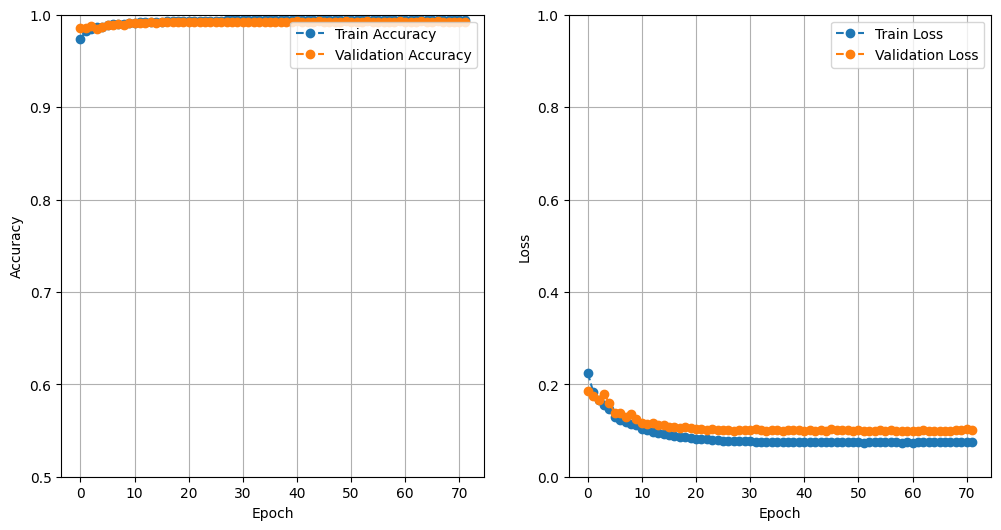

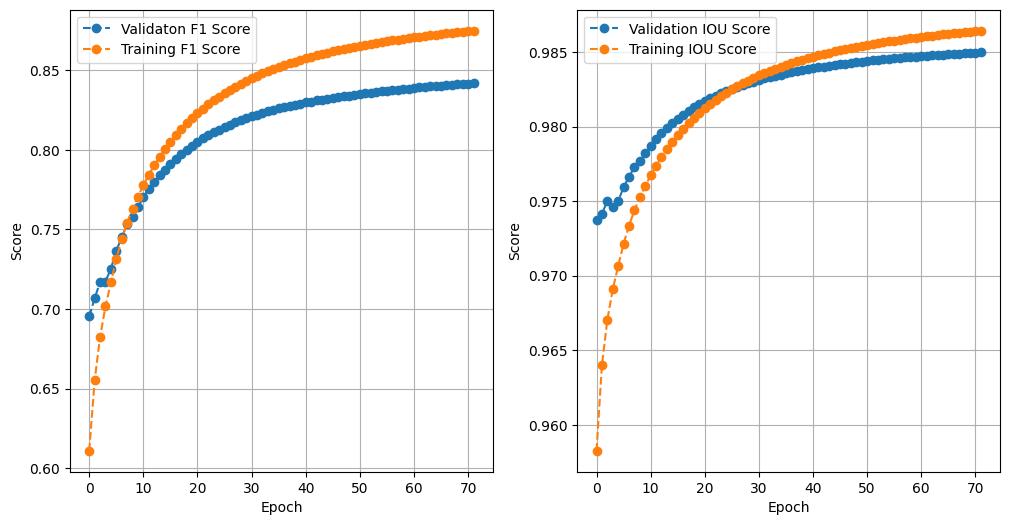

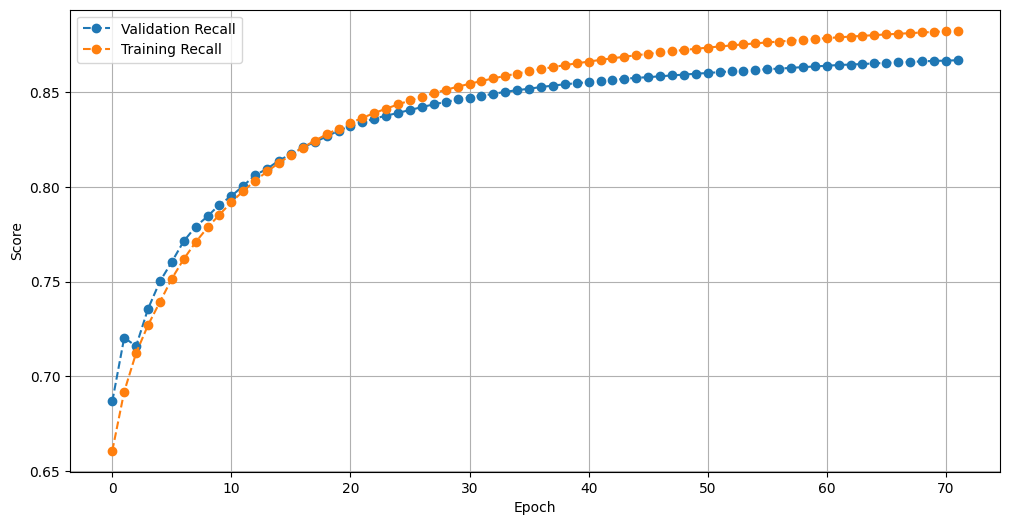

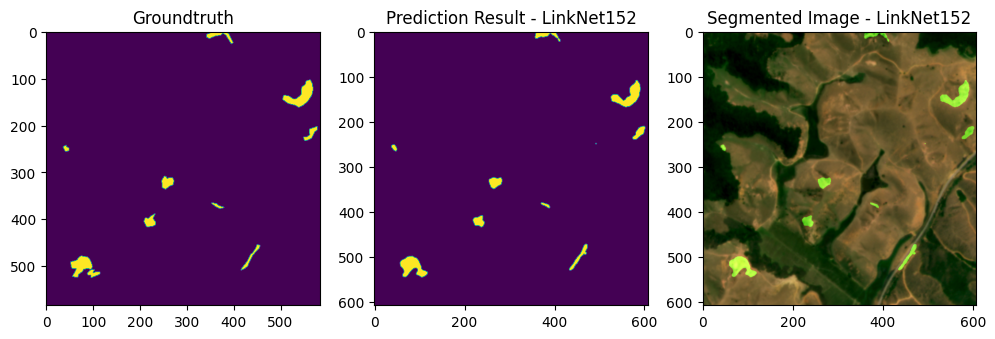

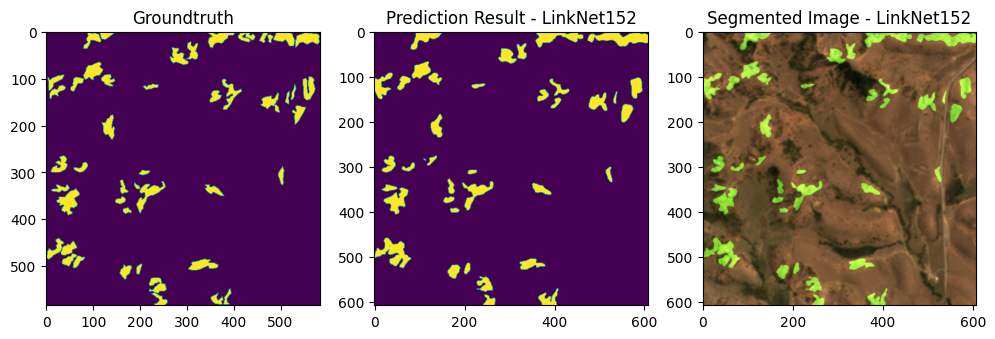

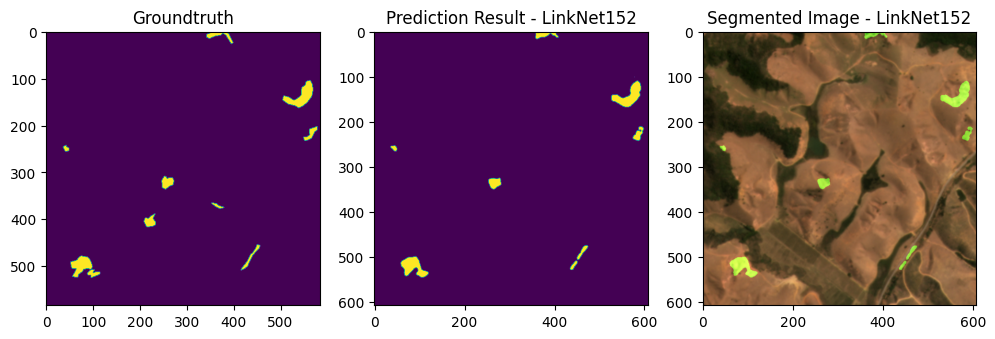

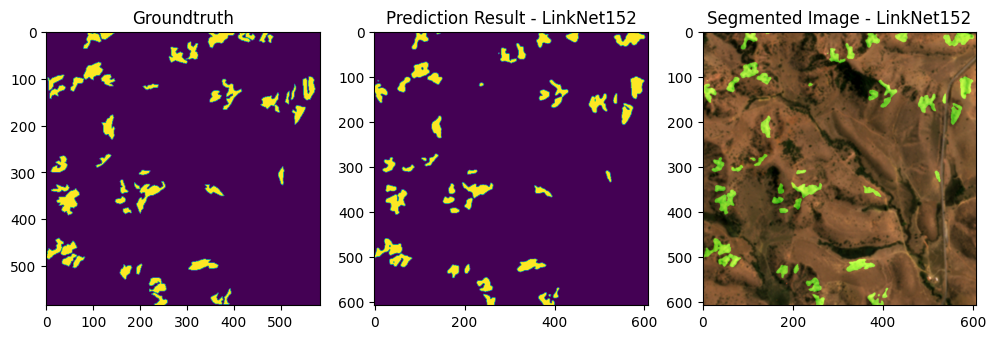

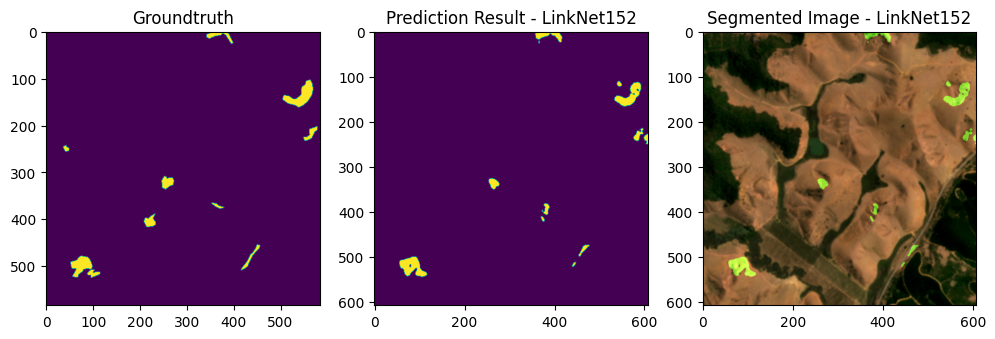

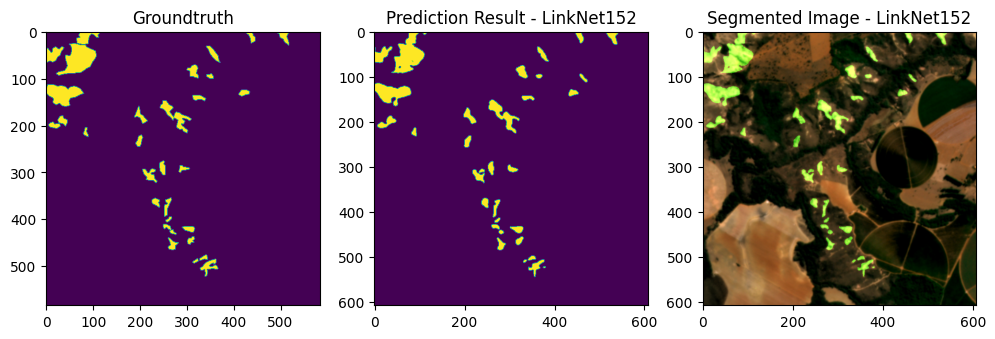

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=10,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)